# Machine Learning 2018
## Homework #1
### Natasha Mathur

#### This analysis was largely done on information from the year 2017 due to size constraints. 'American FactFinder' and the Census website were used to obtain information. I discussed the assignment with classmates Andrea Koch and Saptarshi Ghose

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import datetime
import seaborn as sns
import requests
import json

# Problem 1

## Data Acquisition 

In [2]:
# Read in the csvs into dataframes
alley = pd.read_csv('311 Alley.csv')
graffiti = pd.read_csv('311 Graffiti.csv')
vacant = pd.read_csv('311 Vacant.csv')
vdf = vacant

In [3]:
# Modify 'vacant' dataframe to match columns in other dataframes
vacant.rename(columns={"SERVICE REQUEST TYPE": "Type of Service Request", \
                    "X COORDINATE": "X Coordinate", \
                    "Y COORDINATE": "Y Coordinate", \
                    "ZIP CODE": "ZIP Code", \
                    "SERVICE REQUEST NUMBER": "Service Request Number",\
                    "LATITUDE": "Latitude", "LONGITUDE": "Longitude", \
                    "DATE SERVICE REQUEST WAS RECEIVED": "Creation Date",\
                    }, inplace = True)
vacant["Street Address"] = vacant[vacant.columns[10:14]].apply(lambda x: ' '.join(x.astype(str)), axis = 1)

# Make a combined data frame with common columns
acols = set(alley.columns)
gcols = set(graffiti.columns)
vcols = set(vacant.columns)

common_cols = list(acols.intersection(vcols))

all = [alley, graffiti, vacant]
combined = pd.concat(all, ignore_index = True)
combined = combined[common_cols]
combined.shape
combined.columns

Index(['Longitude', 'Police District', 'Latitude', 'Location', 'Y Coordinate',
       'Creation Date', 'Type of Service Request', 'Community Area',
       'Service Request Number', 'X Coordinate', 'Street Address', 'ZIP Code',
       'Ward'],
      dtype='object')

## Data Analysis for Problem 3

In [4]:
using_property = vdf.groupby(['ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)'])
using_property.size().to_frame()

,0
"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",
False,1881
True,1267


In [5]:
sdf = combined.loc[combined['Street Address'].isin(['3600 W ROOSEVELT RD'])]
roosevelt_df = combined.loc[combined['ZIP Code'].isin(['60624'])]
roosevelt_df.groupby(['Type of Service Request']).count()

,Longitude,Police District,Latitude,Location,Y Coordinate,Creation Date,Community Area,Service Request Number,X Coordinate,Street Address,ZIP Code,Ward
Type of Service Request,,,,,,,,,,,,
Alley Light Out,612,612,612,612,612,612,612,612,612,612,612,612
Graffiti Removal,310,311,310,310,311,311,311,311,311,311,311,311
Vacant/Abandoned Building,146,146,146,146,146,146,146,146,146,146,146,146


In [6]:
garfield_df = combined.loc[combined['ZIP Code'].isin(['60624', '60612'])]
garfield_df.groupby(['Type of Service Request']).count()

,Longitude,Police District,Latitude,Location,Y Coordinate,Creation Date,Community Area,Service Request Number,X Coordinate,Street Address,ZIP Code,Ward
Type of Service Request,,,,,,,,,,,,
Alley Light Out,953,953,953,953,953,953,953,953,953,953,953,953
Graffiti Removal,2260,2261,2260,2260,2261,2261,2261,2261,2261,2261,2261,2261
Vacant/Abandoned Building,198,198,198,198,198,198,198,198,198,198,198,198


In [7]:
uptown_df = combined.loc[combined['ZIP Code'].isin(['60613', '60640'])]
uptown_df.groupby(['Type of Service Request']).count()

,Longitude,Police District,Latitude,Location,Y Coordinate,Creation Date,Community Area,Service Request Number,X Coordinate,Street Address,ZIP Code,Ward
Type of Service Request,,,,,,,,,,,,
Alley Light Out,371,371,371,371,371,371,371,371,371,371,371,371
Graffiti Removal,5120,5120,5120,5120,5120,5120,5120,5120,5120,5120,5120,5120
Vacant/Abandoned Building,3,3,3,3,3,3,3,3,3,3,3,3


## Number of Calls by Ward

In [8]:
wards = combined.groupby('Ward')
type(wards['Service Request Number'].count())

pandas.core.series.Series

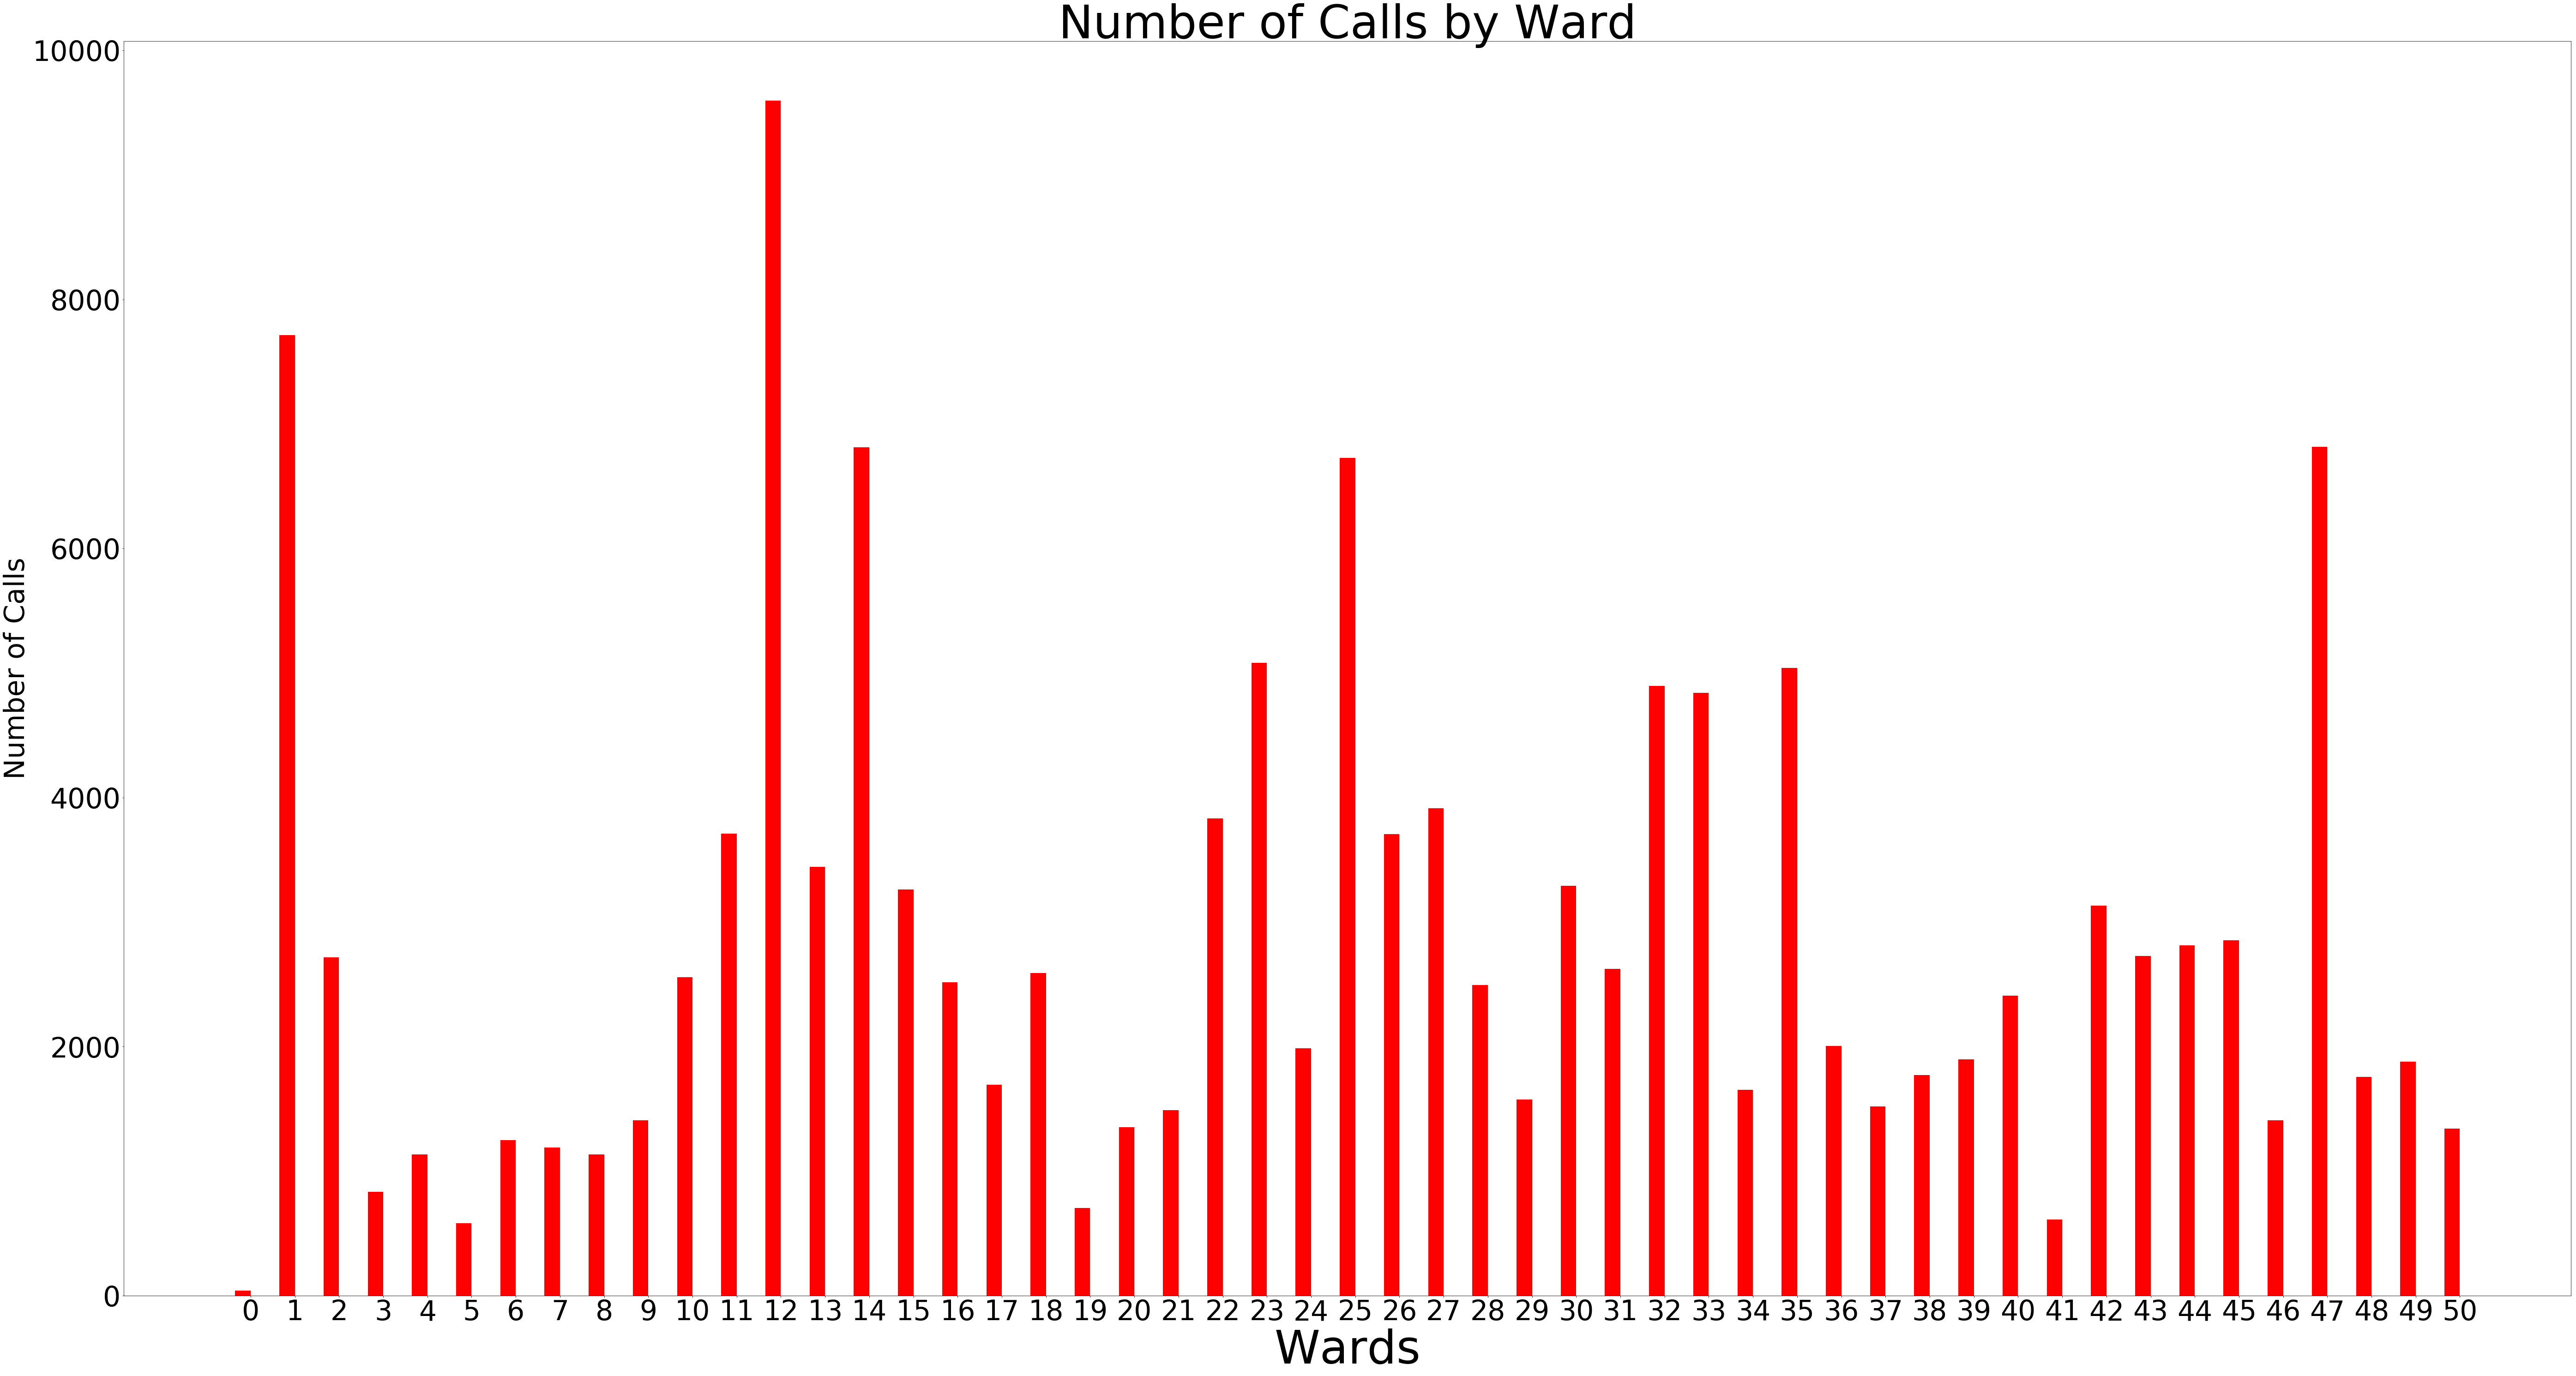

In [14]:
wards = combined.groupby('Ward')
y_vals = tuple(wards['Service Request Number'].count())
x_vals = range(0, 51)

N = 51
counts = y_vals

ind = np.arange(N)  # the x locations for the groups
width = 0.35

fig, ax = plt.subplots()
r = ax.bar(ind, y_vals, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Calls', fontsize=60)
ax.set_xlabel('Wards',fontsize=100)
ax.set_title('Number of Calls by Ward',fontsize=100)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_vals)

rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

# Alley - Specific Analysis

In [10]:
alley['Creation Date'] = pd.to_datetime(alley['Creation Date'])
alley['Completion Date'] = pd.to_datetime(alley['Completion Date'])
alley['Response Time'] = alley['Completion Date'] - alley['Creation Date']

In [11]:
alley['Response Time'].describe()

count                      24051
mean     33 days 11:44:45.742796
std      46 days 10:42:46.210381
min              0 days 00:00:00
25%              2 days 00:00:00
50%             14 days 00:00:00
75%             48 days 00:00:00
max            403 days 00:00:00
Name: Response Time, dtype: object

## The average response time for an alley light related complaint was 33 days. 

In [12]:
copied = combined
copied.index = copied['Creation Date']
y_val = tuple(copied.groupby(by=[copied.index.month]).count()['Creation Date'])

AttributeError: 'Index' object has no attribute 'month'

In [ ]:
N = 12
x_vals = range(1,13)
x_vals = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ind = np.arange(N)  # the x locations for the groups
width = 0.35

fig, ax = plt.subplots()
r = ax.bar(ind, creation, width, color='lightblue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Calls', fontsize=100)
ax.set_xlabel('Months',fontsize=100)
ax.set_title('Number of Alley Light Calls by Month',fontsize=150)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_vals)

rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

## Combined Data Analysis

In [ ]:
combined.groupby(['Type of Service Request']).describe()

In [ ]:
N = 3
counts = (27887, 112769, 3662)


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, counts, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Calls')
ax.set_title('Number of Calls by Complaint Type')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Alley', 'Graffiti', 'Vacant'))

plt.show()

In [ ]:
all_complaints = combined.groupby(['Type of Service Request'])
all_complaints.size().to_frame()

In [ ]:
corr = combined.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

# Problem 2

In [ ]:
from census import Census
from us import states

In [ ]:
# Function to process a dataframe of longitudes and latitudes 
# and connect it to FIPS and American FactFinder data. 

race = 'B02001_003E'

def process(df):
    url1 = "https://geo.fcc.gov/api/census/block/find?latitude="
    url3 = "&longitude="
    url5 = "&showall=false&format=json"
    for row in df.iterrows():
        url_lat = str(row[1]['Latitude'])
        url_long = str(row[1]['Longitude'])
        url = url1 + url_lat + url3 + url_long + url5
        r = requests.get(url).json()
        FIPS = r['Block']['FIPS']
        county = FIPS[2:5]
        tract = FIPS[5:11]
        block = FIPS[11]
        
        race = 'B02001_003E'
        
        acs_url_1 = 'https://api.census.gov/data/2016/acs/acs5?get=NAME,'
        acs_url_2 = '{}&for=block%20group:{}&in=state:17%20county:{}%20tract:{}&key=057067ab3c89ff8d3a7a8dc08534ca151bb76bb2'.format(race_key, block, county, tract)
        acs_url = acs_url_1 + race + acs_url_2
        
        acs_data = requests.get(acs_url).json()
        
        if int(acs_data[1][1]) == 0:
            race.append(0)
        else:
            race.append(int(acs_data[1][2]) / int(acs_data[1][1]))

process(combined)


In [ ]:
block = '1'
county = '720600'
tract = '031'

race = 'B02001_003E'
acs_url_1 = 'https://api.census.gov/data/2016/acs/acs5?get=NAME,'
acs_url_2 = '&for=block%20group:1&in=state:17%20county:031%20tract:720600&key=057067ab3c89ff8d3a7a8dc08534ca151bb76bb2'
acs_url = acs_url_1 + race +  acs_url_2
print(acs_url)


In [ ]:
c = Census("4e30b193a1f5eca9ecee8af6534c42ce95d95033")
#c.sf1.state_county_tract('NAME', states.IL.fips, '031', Census.ALL)

In [ ]:
combo_copy = combined

race_df = pd.read_csv('ACS_16_race.csv')
female_df = pd.read_csv('ACS_16_female.csv')
female_df.columns = ['ZIP Code', 'Female Population']
race_df.columns = ['ZIP Code', 'White Population']
married_df = pd.read_csv('ACS Married.csv')
language_df = pd.read_csv('ACS languages.csv')
language_df = language_df[['ZIP Code', 'Percent; Estimate; Speak a language other than English']]
language_df.columns = ['ZIP Code', 'Non-Native English Speakers']
combo_copy.columns

In [ ]:
combo_copy = combo_copy.merge(race_df, on = 'ZIP Code')
combo_copy = combo_copy[['Type of Service Request', 'ZIP Code', 'Location','Latitude',
                         'Longitude', 'Ward', 'White Population']]
combo_copy = combo_copy.merge(married_df, on = 'ZIP Code')
combo_copy = combo_copy.merge(language_df, on = 'ZIP Code')
combo_copy = combo_copy.merge(female_df, on = 'ZIP Code')
combo_copy.columns


In [ ]:
no_eng = combo_copy[['Type of Service Request', 'Non-Native English Speakers']]
no_eng['Non-Native English Speakers'] = pd.to_numeric(no_eng['Non-Native English Speakers'], errors='coerce')
nec = no_eng.groupby(['Type of Service Request'])
nec.mean()

In [ ]:
m = combo_copy[['Type of Service Request', 'Percent Married']]
m['Percent Married'] = pd.to_numeric(m['Percent Married'], errors='coerce')
mc = m.groupby(['Type of Service Request'])
mc.mean()

In [ ]:
white = combo_copy[['Type of Service Request', 'White Population']]
white_complaints = white.groupby(['Type of Service Request'])
white_complaints.mean()

In [ ]:
fc = combo_copy[['Type of Service Request', 'Female Population']]
fc = fc.groupby(['Type of Service Request'])
fc.mean()